# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
btc = requests.get(btc_url).json()

# Fetch current ETH price
eth = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc["data"]["1"]['quotes']['USD']['price']
my_eth_value = eth["data"]["1027"]['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31521.00
The current value of your 5.3 ETH is $1311.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_eth_value + my_btc_value
shares_value = my_agg_value + my_spy_value
savings = {'amount' : [crypto_value, shares_value]}
assets = ["crypto", "shares"]
df_savings = pd.DataFrame(data = savings, index = assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,32832.06
shares,42728.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

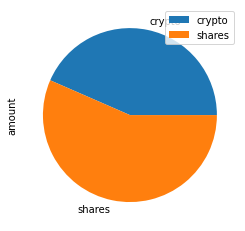

In [12]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', subplots = True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund: print("You have reached your goal amount for the emergency fund!")
else: print("You do not have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-24', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004609,0.998195,0.999792,0.993464,1.001118,0.999028,0.996720,1.002808,0.990877,1.002372,...,0.995931,0.994774,1.005763,1.013538,1.009469,0.988380,1.007272,0.999764,1.003689,0.993501
2,0.994117,0.995674,1.003478,0.984052,0.998299,1.003415,1.010625,1.007628,0.989056,1.007555,...,0.999152,0.998135,0.999076,1.019100,1.013409,0.985559,1.000382,0.993878,0.999441,0.995325
3,0.991007,1.004719,1.010748,0.984253,0.989067,1.008760,1.004542,1.007007,0.993273,1.002318,...,1.006909,1.010083,1.012271,1.022066,1.006410,0.979571,1.002255,1.000944,0.989165,0.996248
4,0.984713,1.000443,1.007667,0.990060,0.986945,1.009403,1.001962,1.009522,1.001021,0.997839,...,1.005105,1.013671,1.025097,1.014192,1.010905,0.982683,1.000548,1.009292,0.992797,1.001993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.332878,14.326530,21.207135,5.827589,8.673640,27.071570,4.134922,34.758617,10.856354,25.008420,...,31.244290,23.045378,54.321328,7.546606,18.703260,29.732404,7.092259,15.061798,14.474097,8.168888
7557,25.076536,14.298282,21.124444,5.867205,8.578244,26.879778,4.109133,34.554981,11.000427,24.555745,...,31.253679,23.311478,55.159578,7.429138,18.680624,30.098624,7.103071,14.966906,14.332426,8.104667
7558,25.317355,14.277117,21.256580,5.839262,8.528763,26.628206,4.145888,34.353087,11.031340,24.644509,...,31.215242,23.548587,55.005180,7.471000,18.562679,29.837797,7.219537,15.043069,14.229739,8.067126
7559,25.203183,14.184846,21.374390,5.834863,8.666545,26.918034,4.109385,34.231785,11.159712,24.969225,...,31.481867,23.760174,55.380180,7.521200,18.586644,29.839728,7.312334,15.056683,14.271365,8.094862


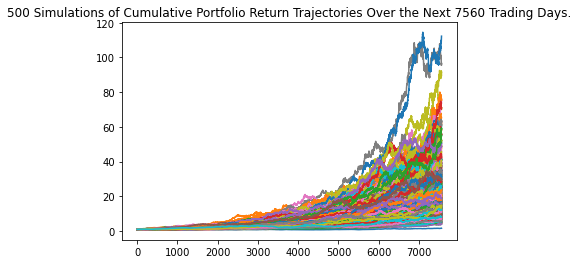

In [19]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

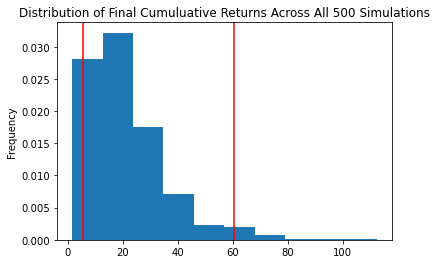

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(sim_summary)

count           500.000000
mean             21.560000
std              14.551331
min               1.637323
25%              11.375880
50%              17.884608
75%              27.533518
max             112.237681
95% CI Lower      5.484797
95% CI Upper     60.563431
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sim_summary[8]*initial_investment,2)
ci_upper = round(sim_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $109695.94 and $1211268.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sim_summary[8]*initial_investment,2)
ci_upper = round(sim_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $164543.91 and $1816902.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998667,1.001116,0.996512,1.004182,0.998885,0.996959,1.010968,0.992414,0.998186,1.005034,...,1.002262,1.001295,0.998493,1.005572,0.991037,1.002354,1.005913,0.996436,0.998364,0.999221
2,1.001032,1.003522,1.002714,1.015850,0.999835,1.000334,1.015659,0.991913,0.993972,1.007700,...,0.998367,0.997186,0.996882,1.015130,0.993634,1.004453,1.004267,0.997028,1.001406,0.998752
3,0.998426,1.000009,1.003707,1.013500,1.001574,0.998774,1.015059,0.995474,0.994690,1.018687,...,0.997516,0.988343,0.994757,1.020571,0.998950,1.002076,1.007266,1.003950,0.998886,0.999736
4,1.004743,1.008760,1.000984,1.010742,0.992696,0.993902,1.013902,1.003293,0.991238,1.026895,...,0.999063,0.982074,0.993744,1.013017,1.006411,1.009284,1.005346,1.002368,0.994529,1.003685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.511779,1.402176,1.255826,1.776661,1.510923,1.266463,1.434164,1.641318,1.317927,1.103615,...,1.392665,1.404625,1.021312,1.088017,1.248200,1.411890,1.266238,1.440706,1.393911,1.274334
1257,1.507237,1.403768,1.253601,1.768764,1.516972,1.266371,1.439032,1.657477,1.325309,1.119454,...,1.395436,1.398083,1.025349,1.096704,1.246420,1.413466,1.260174,1.426400,1.398860,1.265273
1258,1.511870,1.401239,1.248343,1.775457,1.516449,1.276522,1.432592,1.657210,1.326226,1.119808,...,1.396348,1.393493,1.026952,1.096098,1.255041,1.409794,1.250094,1.428140,1.397102,1.262686
1259,1.519837,1.407242,1.255674,1.780948,1.509582,1.267654,1.423208,1.659396,1.324548,1.119345,...,1.392373,1.391010,1.019938,1.108778,1.255388,1.407433,1.253270,1.426727,1.403786,1.257622


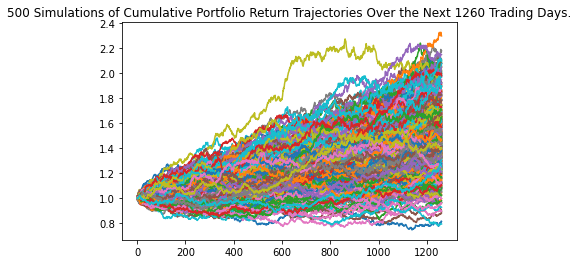

In [27]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

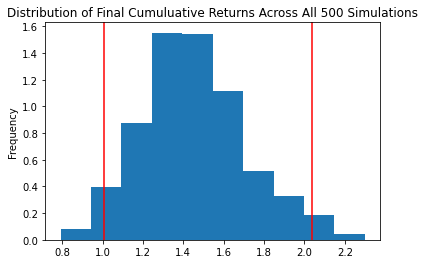

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(sim_summary)

count           500.000000
mean              1.452172
std               0.259459
min               0.791758
25%               1.260016
50%               1.430846
75%               1.613524
max               2.299471
95% CI Lower      1.006753
95% CI Upper      2.036184
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sim_summary[8]*initial_investment,2)
ci_upper_five = round(sim_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60405.18 and $122171.07


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004360,1.003875,0.998000,1.002013,0.996677,1.006523,1.004473,1.004727,0.993436,1.001477,...,1.001545,0.998315,0.998700,1.001245,0.997579,0.987835,1.000207,0.999717,1.003125,0.997657
2,0.994639,1.003114,0.993545,0.999161,0.992580,1.003005,1.007070,1.005227,0.994275,0.992104,...,0.996501,0.998955,0.995248,1.002567,1.004429,0.989828,0.993275,0.997906,0.993308,1.006722
3,0.994662,1.000237,0.997111,0.991252,0.987563,1.002253,1.013228,1.007172,0.995524,0.991095,...,1.002301,0.995232,0.997783,0.997196,1.000665,0.985800,0.992049,1.003575,0.991873,1.002281
4,0.993799,0.998961,0.993168,0.996262,0.998726,1.002231,1.013029,1.016347,0.994899,0.999292,...,1.002552,0.992252,0.999753,0.997703,1.005734,0.988447,0.998000,0.996731,0.996652,1.003356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.825975,2.714414,2.827996,3.344873,2.124495,2.353726,1.199032,2.421883,1.954513,1.353001,...,1.669465,2.619861,1.650210,2.095533,2.195386,2.462584,1.696333,2.996137,2.642665,2.385309
2517,2.833186,2.689031,2.826717,3.354480,2.140969,2.342333,1.201066,2.431111,1.954573,1.361406,...,1.687101,2.643069,1.657386,2.102145,2.186403,2.477904,1.698178,2.979485,2.645063,2.391979
2518,2.838478,2.706994,2.813814,3.362112,2.138623,2.360224,1.194601,2.433157,1.942292,1.358379,...,1.683196,2.660850,1.650914,2.102788,2.181926,2.491222,1.691267,2.970554,2.653762,2.388302
2519,2.833108,2.709639,2.813985,3.352319,2.112945,2.338978,1.205414,2.421960,1.940275,1.372010,...,1.674012,2.654170,1.636581,2.131017,2.182871,2.500234,1.702495,2.954234,2.650183,2.410382


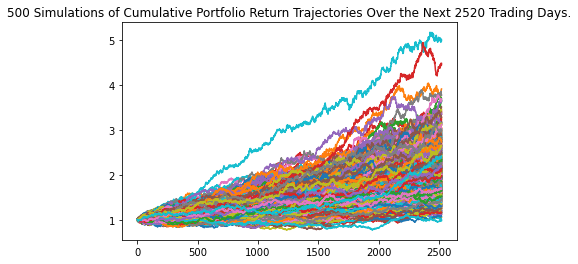

In [34]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

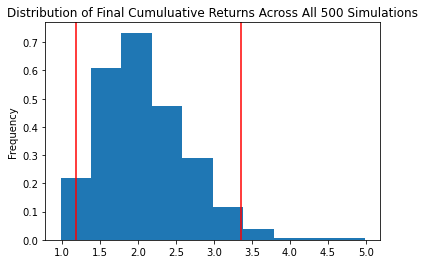

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(sim_summary)

count           500.000000
mean              2.082853
std               0.575570
min               0.979008
25%               1.662956
50%               2.006744
75%               2.451075
max               4.984937
95% CI Lower      1.185866
95% CI Upper      3.358081
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sim_summary[8]*initial_investment,2)
ci_upper_ten = round(sim_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71151.97 and $201484.87
